# Import Libraries

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load Dataset

In [20]:
df = pd.read_csv('Lab2.csv')
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.800,471784.1000,New York,192261.83000
1,162597.70,151377.590,443898.5300,California,191792.06000
2,153441.51,101145.550,407934.5400,Florida,191050.39000
3,144372.41,118671.850,383199.6200,New York,182901.99000
4,142107.34,91391.770,366168.4200,Florida,166187.94000
...,...,...,...,...,...
995,54135.00,118451.999,173232.6695,California,95279.96251
996,134970.00,130390.080,329204.0228,California,164336.60550
997,100275.47,241926.310,227142.8200,California,413956.48000
998,128456.23,321652.140,281692.3200,California,333962.19000


In [21]:
plt.rcParams['figure.figsize'] = (15,6)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        1000 non-null   float64
 1   Administration   1000 non-null   float64
 2   Marketing Spend  1000 non-null   float64
 3   State            1000 non-null   object 
 4   Profit           1000 non-null   float64
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


In [23]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [24]:
correlation = df.corr()
correlation

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.582434,0.978407,0.945245
Administration,0.582434,1.000000,0.520465,0.741560
Marketing Spend,0.978407,0.520465,1.000000,0.917270
Profit,0.945245,0.741560,0.917270,1.000000


In [26]:
df.corr()['Profit'].sort_values().to_frame()

,Profit
Administration,0.741560
Marketing Spend,0.917270
R&D Spend,0.945245
Profit,1.000000


<AxesSubplot:>

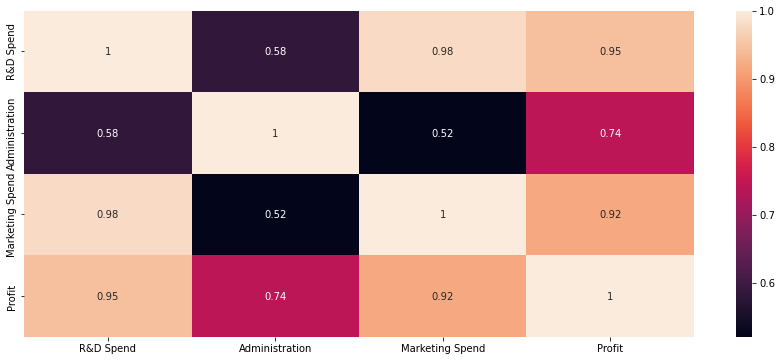

In [27]:
sns.heatmap(correlation, annot=True)

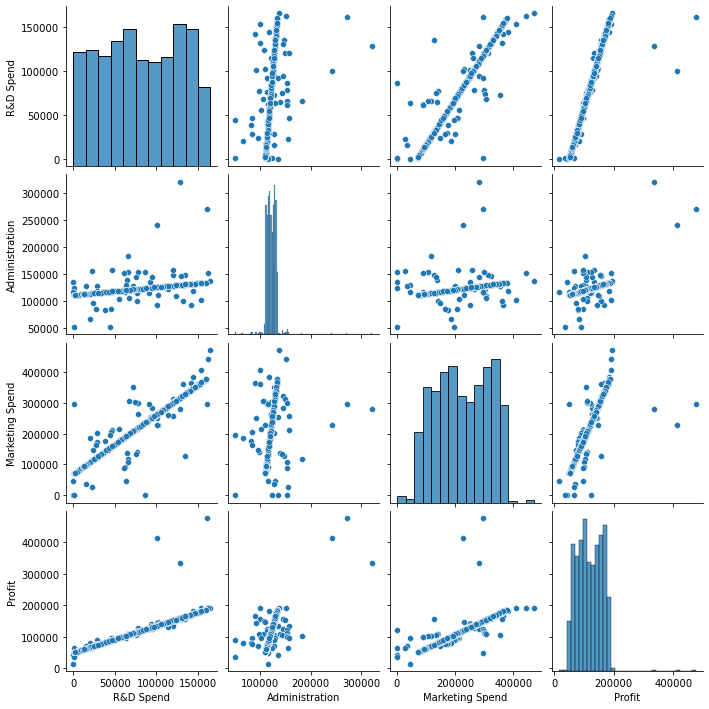

In [29]:
sns.pairplot(df)

In [30]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [31]:
x = df[['R&D Spend', 'Administration', 'Marketing Spend', 'State']].values
y = df[['Profit']].values

In [32]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [33]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
x = np.array(ct.fit_transform(x))

In [34]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [35]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_model = lin_reg.fit(x_train, y_train)


In [36]:
y_pred = lin_model.predict(x_test)
np.set_printoptions(precision=2)
print(y_pred)

[[ 89790.62]
 [ 88427.07]
 [ 94894.68]
 [175680.87]
 [ 83411.73]
 [110571.9 ]
 [132145.23]
 [ 91473.38]
 [164597.05]
 [ 53222.83]
 [ 66950.19]
 [150566.44]
 [126915.21]
 [ 59337.86]
 [177513.91]
 [ 75316.28]
 [118248.14]
 [164574.41]
 [170937.29]
 [182069.12]
 [118845.03]
 [ 85669.95]
 [180992.59]
 [ 84145.08]
 [105005.84]
 [101233.57]
 [ 53831.08]
 [ 56881.41]
 [ 68896.39]
 [210040.01]
 [120778.72]
 [111724.87]
 [101487.91]
 [137959.03]
 [ 63969.96]
 [108857.91]
 [186014.73]
 [171442.64]
 [174644.27]
 [117671.49]
 [ 96731.38]
 [165452.26]
 [107724.34]
 [ 50194.54]
 [116513.9 ]
 [ 58632.49]
 [158416.47]
 [ 78541.49]
 [159727.67]
 [131137.88]
 [184880.71]
 [174609.08]
 [ 93745.66]
 [ 78341.13]
 [180745.9 ]
 [ 84461.61]
 [142900.91]
 [170618.44]
 [ 84365.1 ]
 [105307.37]
 [141660.07]
 [ 52527.34]
 [141842.96]
 [139176.28]
 [ 98294.53]
 [113586.87]
 [126754.22]
 [152135.52]
 [ 58864.52]
 [174285.57]
 [124624.04]
 [169065.78]
 [ 91279.33]
 [156170.37]
 [ 84307.27]
 [ 77877.75]
 [120414.02]

In [37]:
compare = np.concatenate((y_pred, y_test), axis=1)
df_compare = pd. DataFrame(compare, columns=['y_pred', 'y_test'])
df_compare

,y_pred,y_test
0,89790.615329,89012.02672
1,88427.071874,87654.55773
2,94894.678370,94093.35179
3,175680.867256,175396.26160
4,83411.730421,83356.61784
...,...,...
195,165897.619059,164779.98270
196,168655.486526,168402.17810
197,147009.668050,145976.17530
198,141396.221041,141082.79440


In [38]:
print("These are the values of model coeficients : ", lin_model.coef_)
print("This is the intercept model : ", lin_model.intercept_)

These are the values of model coeficients :  [[ 5.26e+02 -3.54e+02 -1.72e+02  5.26e-01  8.44e-01  1.08e-01]]
This is the intercept model :  [-51561.46]


In [42]:
from sklearn.metrics import r2_score
R2 = r2_score(y_test, y_pred)
print("This is the value of R^2 :{:.2f}".format(R2 * 100.00) , "%")

This is the value of R^2 :91.13 %


In [40]:
print(lin_model.predict([[1, 0, 0, 160000, 130000, 300000]]))

[[175143.2]]
